In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import plotly.graph_objs as go
import pandas_ta as ta
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('data.csv', index_col = 'Date', parse_dates = True)

Making the Date column the index and dropping it from the DataFrame

In [4]:
df.head()

Low   High  Close   Open
Date                                  
1999-11-01  77.37  80.69  77.62  80.00
1999-11-02  77.31  81.69  80.25  78.00
1999-11-03  81.00  83.25  81.50  81.62
1999-11-04  80.62  85.37  83.62  82.06
1999-11-05  84.00  88.37  88.31  84.62

Trying a different type of data with more range

In [6]:
df1 = yf.download("IBM", start='2018-01-01', end='2020-12-31')
df1.head()

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  147.705551  148.001907  146.787766  147.466537  108.470901   
2018-01-03  150.420654  152.782028  149.455063  151.520081  111.452560   
2018-01-04  152.629059  155.181641  152.361374  154.588913  113.709854   
2018-01-05  155.296371  155.736145  154.015289  155.344162  114.265411   
2018-01-08  155.506699  156.701721  154.588913  156.281067  114.954559   

             Volume  
Date                 
2018-01-02  4395815  
2018-01-03  9875914  
2018-01-04  7903785  
2018-01-05  5434807  
2018-01-08  5478425

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2018-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       755 non-null    float64
 1   High       755 non-null    float64
 2   Low        755 non-null    float64
 3   Close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   Volume     755 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [8]:
df1.describe()

Open        High         Low       Close   Adj Close  \
count  755.000000  755.000000  755.000000  755.000000  755.000000   
mean   129.174300  130.311347  127.978208  129.128006  101.585989   
std     12.748917   12.542601   12.897806   12.704891    7.740871   
min     90.439774   93.441681   86.577438   90.602295   73.761391   
25%    118.441681  119.608032  117.361378  118.723709   97.771046   
50%    129.521988  130.277252  128.929260  129.588913  102.667633   
75%    137.997131  138.699806  136.969406  137.978012  106.055595   
max    162.523895  163.604202  160.755264  161.682602  120.880859   

             Volume  
count  7.550000e+02  
mean   5.148572e+06  
std    3.115748e+06  
min    1.257397e+06  
25%    3.389250e+06  
50%    4.271759e+06  
75%    5.642438e+06  
max    2.645219e+07

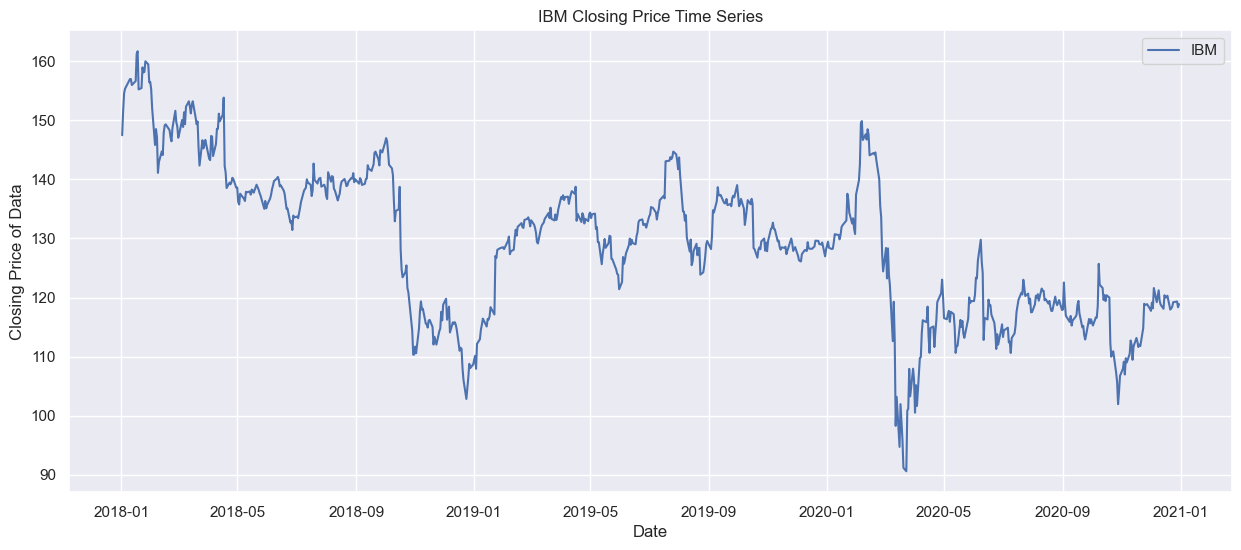

In [9]:
plt.figure(figsize=(15, 6))

sns.set_theme(style = 'darkgrid')
sns.lineplot(data = df1['Close'], label = 'IBM')

plt.xlabel('Date')
plt.ylabel('Closing Price of Data')

plt.title('IBM Closing Price Time Series')
plt.show();

The IBM stock price is generally decreasing over the time period.

Generally there is trend in the data. An upward trend can be seen from 2000 to 2012, Although it falls drastically around 2015, there is still an upward trend mnoving forward.

### Return

In [13]:
df1['Returns'] = df1['Close'].pct_change() * 100

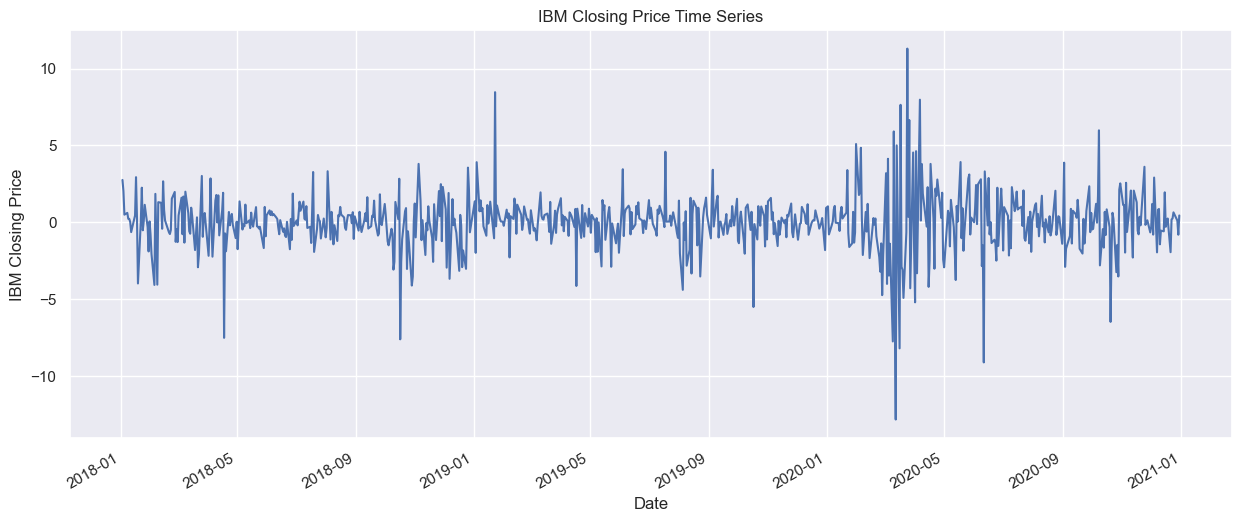

In [14]:
plt.figure(figsize = (15, 6))
df1['Returns'].plot()

plt.ylabel('IBM Closing Price')
plt.xlabel('Date')
plt.title('IBM Closing Price Time Series')

plt.show();

From the above, we can see large losses and gains. The asset isn't too volatile. Type of strategy?


Quickly assess if IBM's returns have been mostly positive or negative over the period.
Determine if there are any discernible long-term trends or patterns in the returns.

Identify periods of high and low volatility. High volatility periods can indicate greater uncertainty and risk, which may impact trading strategies

Look for patterns in volatility changes on the plot. For example, volatility spikes might correspond with earnings reports or significant news events.

In [15]:
# Daily Volatility
df1['Returns'].std()

1.8967760802959575

The daily returns of IBM's stock deviate from the mean by approximately 1.897%. Tells us the typical daily risk associated with trading IBM's stock.

In [84]:
# Annual Volatility
df1['Returns'].std() * np.sqrt(252)

30.24468782180366

Over a year, the returns could deviate from the mean by approximately 15.875%. Tells us the typical yearly risk associated with trading IBM's stock.

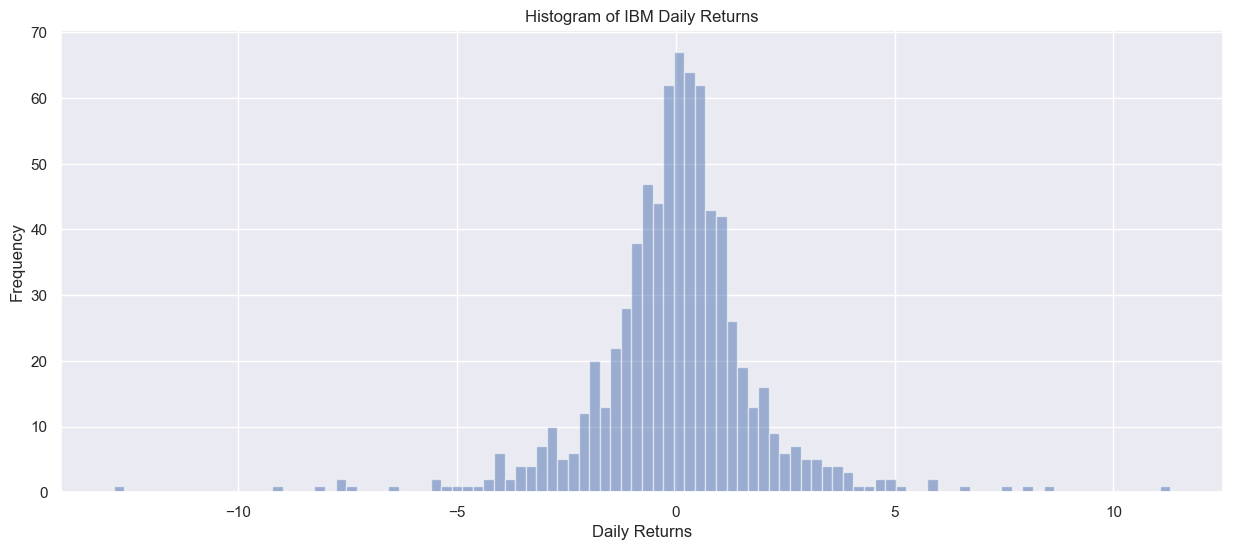

In [18]:
df1['Returns'].hist(bins = 100, label = 'IBM', alpha = 0.5, figsize = (15,6))
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')

plt.title('Histogram of IBM Daily Returns')
plt.show;

In [93]:
df1['Returns'].mean()

-0.022315787659192534

From the histogram above, it can be seen that:

1.) The histogram follows a normal distribution, indicating that the returns are symmetrically distributed around the mean. This suggests that most returns are close to the mean, with fewer returns as you move away from the mean.

2.) The distribution of returns is between -15% and 15%. This indicates that, on most trading days, IBM's stock returns fall within this range.

3.) Extreme Values: The largest positive return is around 13%, and the largest negative return is around -15%. These extremes provide a boundary for the maximum expected daily gains and losses under normal market conditions.

4.) Clustering around Mean: Returns clustering around the mean suggest that the average daily return is representative of the typical performance of the asset. This is useful for predicting future behavior assuming market conditions remain stable.

5.) Standard Deviation: Given that the histogram follows a normal distribution, the standard deviation calculated previously (1.8968%) is a reliable measure of volatility. Most of the returns fall within one standard deviation of the mean, which is expected in a normal distribution.

6.) Risk Assessment: Since the returns are normally distributed and bounded between -15% and 15%, this suggests a certain level of predictability and less likelihood of extreme outliers, which is beneficial for risk management.

7.) Risk-Adjusted Performance: With a known range and a normal distribution, you can apply risk-adjusted performance metrics (like the Sharpe ratio) with confidence, knowing that the returns conform to normal distribution assumptions.

### Volume

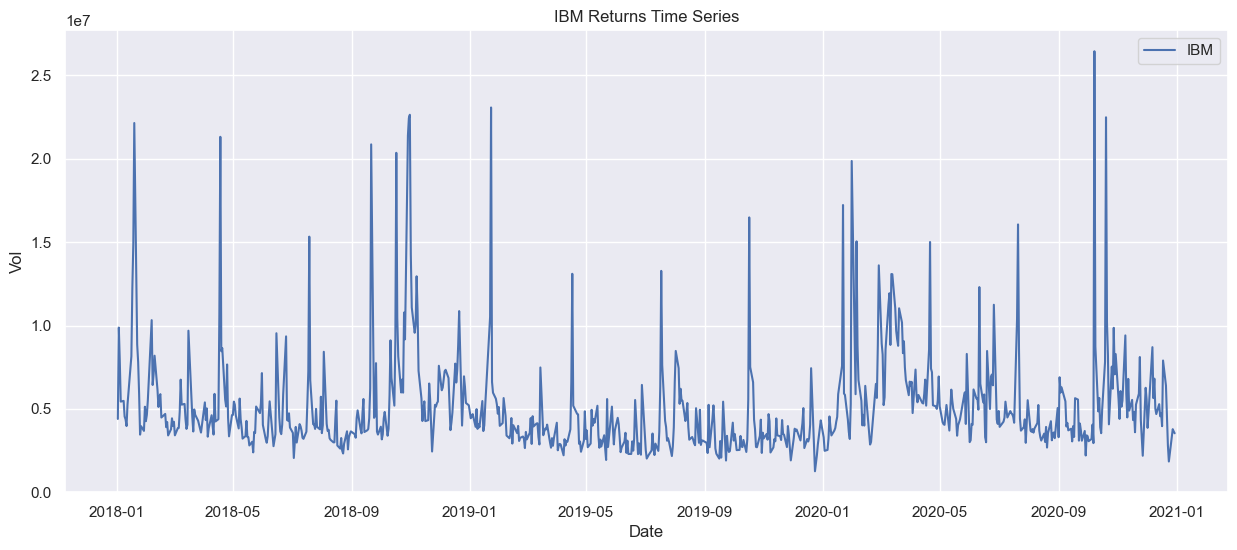

In [20]:
# Volume
plt.figure(figsize=(15, 6))

sns.set_theme(style = 'darkgrid')
sns.lineplot(data = df1['Volume'], label = 'IBM')

plt.xlabel('Date')
plt.ylabel('Vol')

plt.title('IBM Returns Time Series')
plt.show();

From the above, it can be seen that there are significant spikes in trading volume which could often coincide with earnings announcements or other major news.

Correlate volume spikes with price movements to understand if the volume was driven by buying or selling pressure.

A significant price increase along with a significant volume increase, for example, could be a credible sign of a continued bullish trend or a bullish reversal. Adversely, a significant price decrease with a significant volume increase can point to a continued bearish trend or a bearish trend reversal.

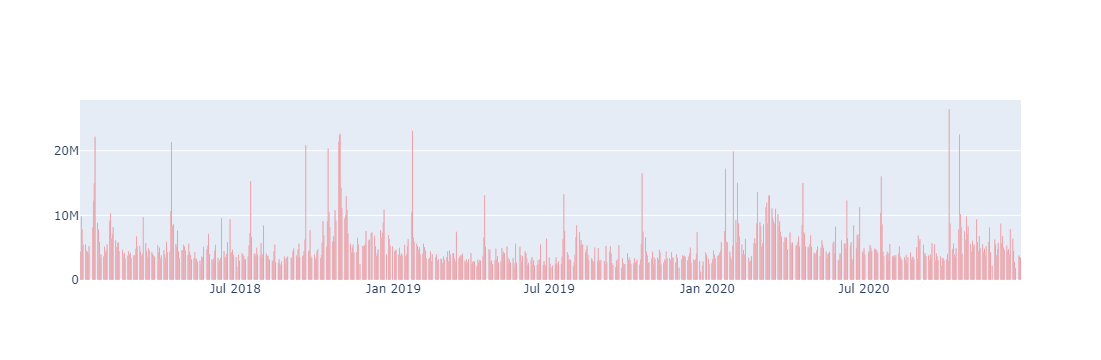

In [22]:
# Interactive Volume
fig = go.Figure(go.Bar(x=df1.index, y=df1.Volume, name='Volume', marker_color='red'))
fig.show()

### Vol vs Closing Price (Volume)

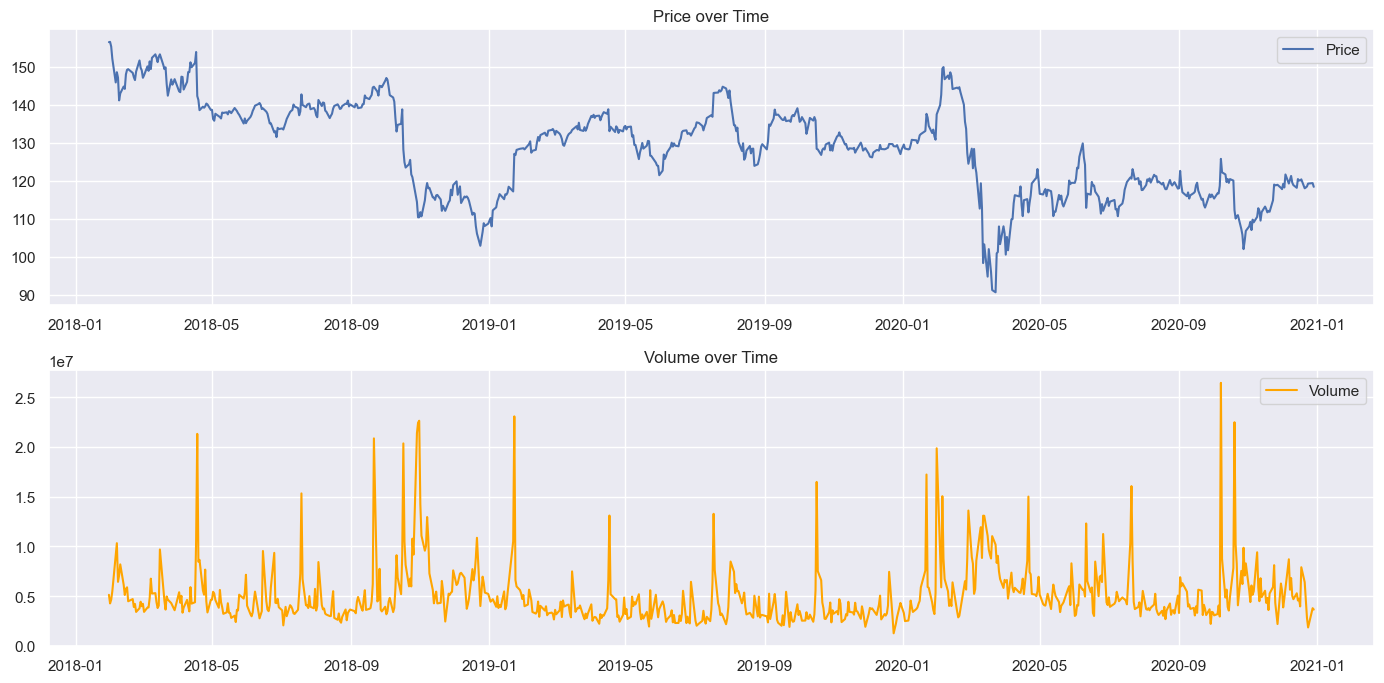

In [98]:
# Plotting the price and volume
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df1['Close'], label='Price')
plt.title('Price over Time')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df1['Volume'], label='Volume', color='orange')
plt.title('Volume over Time')
plt.legend()

plt.tight_layout()
plt.show()

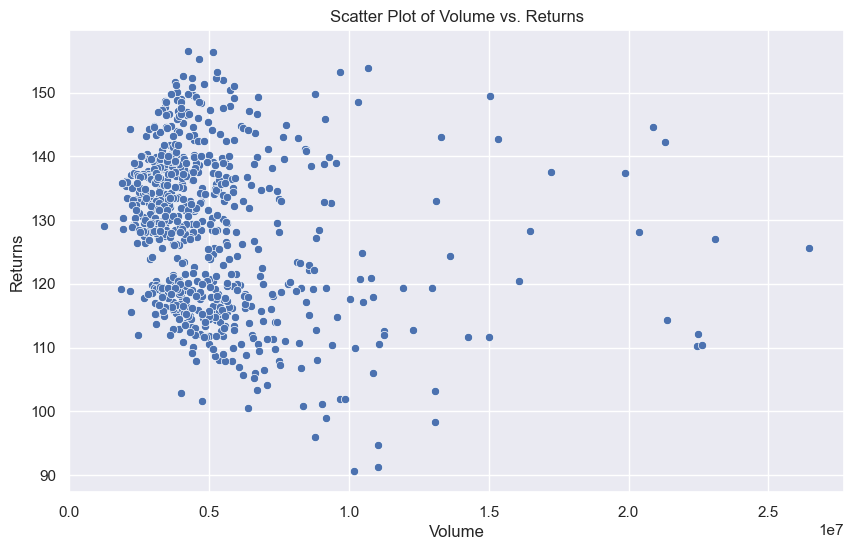

In [108]:
# Scatter plot of Volume vs. Returns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['Volume'], y=df1['Close'])
plt.title('Scatter Plot of Volume vs. Returns')
plt.xlabel('Volume')
plt.ylabel('Returns')
plt.show()

In [110]:
# Calculate correlation coefficient
correlation = df1['Volume'].corr(df1['Close'])
print(f'Correlation between Volume and Returns: {correlation}')

Correlation between Volume and Returns: -0.21791351711231902


The correlation coefficient between trading volume and returns is approximately -0.096. This suggests a weak negative correlation between volume and returns.

The weak correlation indicates that trading volume is not a strong predictor of returns for IBM. Other factors might have a more significant impact on price movements.

### OHLC (Candlesticks)

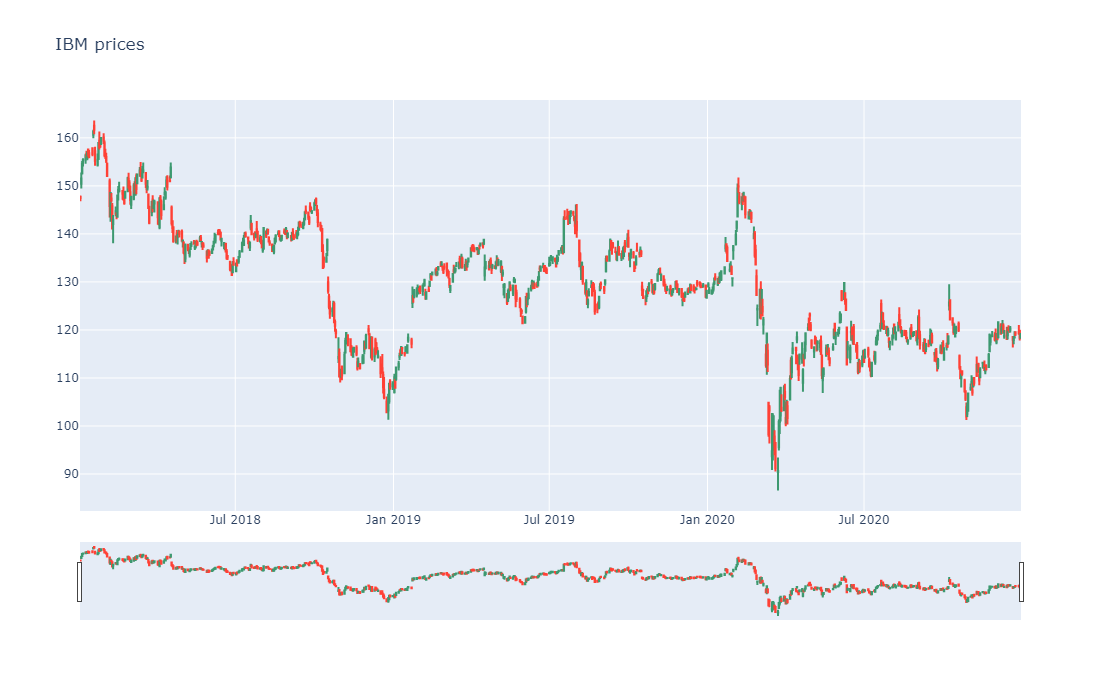

In [24]:
# OHLC Charts
fig = go.Figure([go.Candlestick(x=df1.index,
                         open=df1.Open,
                         high=df1.High,
                         low=df1.Low,
                         close=df1.Close)])
#fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(width=1500, height=700,title='IBM prices')                        

fig.show()

An OHLC chart shows the open, high, low and close prices of a stock. It shows you how the price was changing during a particular day and give you a sense of e.g. momentum or volatility of stock. The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing items are drawn in green whereas decreasing are drawn in red.

## TECHNICAL INDICATORS

### Moving Averages (Trend)

Moving Averages (MA) help to smooth out stock prices on a chart by filtering out short-term price fluctuations. We calculate moving averages over a defined period of time e.g. last 9, 50 or 200 days. There are two (most common) averages used in technical analysis which are:

Simple Moving Average (SMA) - a simple average calculated over last N days e.g. 50, 100 or 200, Exponential Moving Average (EMA) - an average where greater weights are applied to recent prices.

In [29]:
df1['EMA_9'] = df1['Close'].ewm(5, min_periods=1).mean().shift()
df1['SMA_10'] = df1['Close'].rolling(10, min_periods=1, center=False).mean() #  short simple moving average window
df1['SMA_50'] = df1['Close'].rolling(50, min_periods=1, center=False).mean().shift()
df1['SMA_200'] = df1['Close'].rolling(200, min_periods=1, center=False).mean().shift()

In [30]:
df1.head(15)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  147.705551  148.001907  146.787766  147.466537  108.470901   
2018-01-03  150.420654  152.782028  149.455063  151.520081  111.452560   
2018-01-04  152.629059  155.181641  152.361374  154.588913  113.709854   
2018-01-05  155.296371  155.736145  154.015289  155.344162  114.265411   
2018-01-08  155.506699  156.701721  154.588913  156.281067  114.954559   
2018-01-09  156.692154  157.294449  155.889099  156.625244  115.207733   
2018-01-10  155.745697  157.103256  155.353729  156.959854  115.453857   
2018-01-11  157.552582  157.686417  156.118546  156.978973  115.467957   
2018-01-12  156.806885  157.495224  155.860428  155.965576  114.722496   
2018-01-16  157.839386  158.021027  156.166351  156.644363  115.221771   
2018-01-17  160.621414  161.692154  159.904404  161.233276  118.597221   
2018-01-18  162.523895  163.604202  160.755264  161.682602  118.927727   
2018-01-19  157.227539  158.126190  154.206497  155.229446  114.181030   
2018-01-22  154.407272  156.768646  154.024857  155.449326  114.342751   
2018-01-23  155.659653  158.948380  155.363297  158.938812  116.909470   

              Volume   Returns       EMA_9      SMA_10      SMA_50     SMA_200  
Date                                                                            
2018-01-02   4395815       NaN         NaN  147.466537         NaN         NaN  
2018-01-03   9875914  2.748788  147.466537  149.493309  147.466537  147.466537  
2018-01-04   7903785  2.025363  149.677561  151.191844  149.493309  149.493309  
2018-01-05   5434807  0.488553  151.620513  152.229923  151.191844  151.191844  
2018-01-08   5478425  0.603116  152.819184  153.040152  152.229923  152.229923  
2018-01-09   4541523  0.220230  153.783837  153.637667  153.040152  153.040152  
2018-01-10   4366109  0.213637  154.495860  154.112265  153.637667  153.637667  
2018-01-11   3969047  0.012181  155.065502  154.470604  154.112265  154.112265  
2018-01-12   5263367 -0.645562  155.481059  154.636712  154.470604  154.470604  
2018-01-16   8152733  0.435216  155.581225  154.837477  154.636712  154.636712  
2018-01-17  12248660  2.929510  155.792544  156.214151  154.837477  154.837477  
2018-01-18  14915228  0.278680  156.840356  157.230403  155.418913  155.418913  
2018-01-19  22146435 -3.991249  157.749346  157.294456  155.940887  155.940887  
2018-01-22   8870917  0.141648  157.286062  157.304973  155.886161  155.886161  
2018-01-23   7809645  2.244774  156.954083  157.570747  155.854959  155.854959

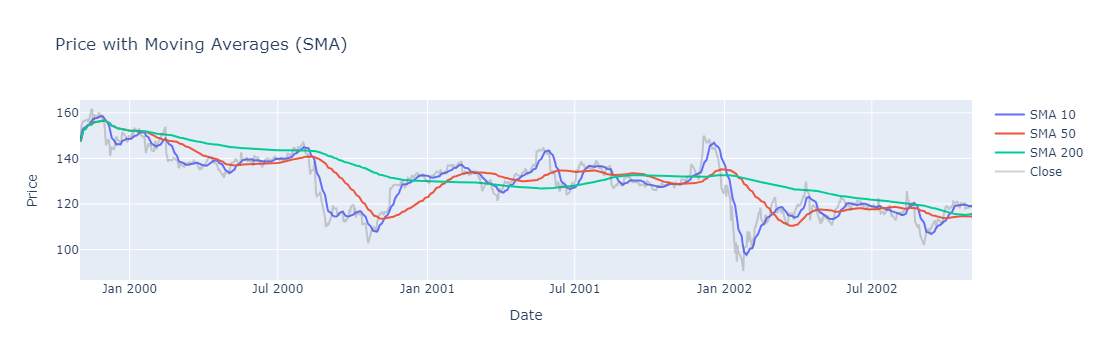

In [31]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=df.index, y=df.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=df.index, y=df1.SMA_10, name='SMA 10'))
fig.add_trace(go.Scatter(x=df.index, y=df1.SMA_50, name='SMA 50'))
fig.add_trace(go.Scatter(x=df.index, y=df1.SMA_200, name='SMA 200'))
fig.add_trace(go.Scatter(x=df.index, y=df1.Close, name='Close', line_color='dimgray', opacity=0.3))

# Update layout to add title and axis labels
fig.update_layout(
    title="Price with Moving Averages (SMA)",  # Set the title
    xaxis_title="Date",  # Set the x-axis label
    yaxis_title="Price",  # Set the y-axis label
)

fig.show()

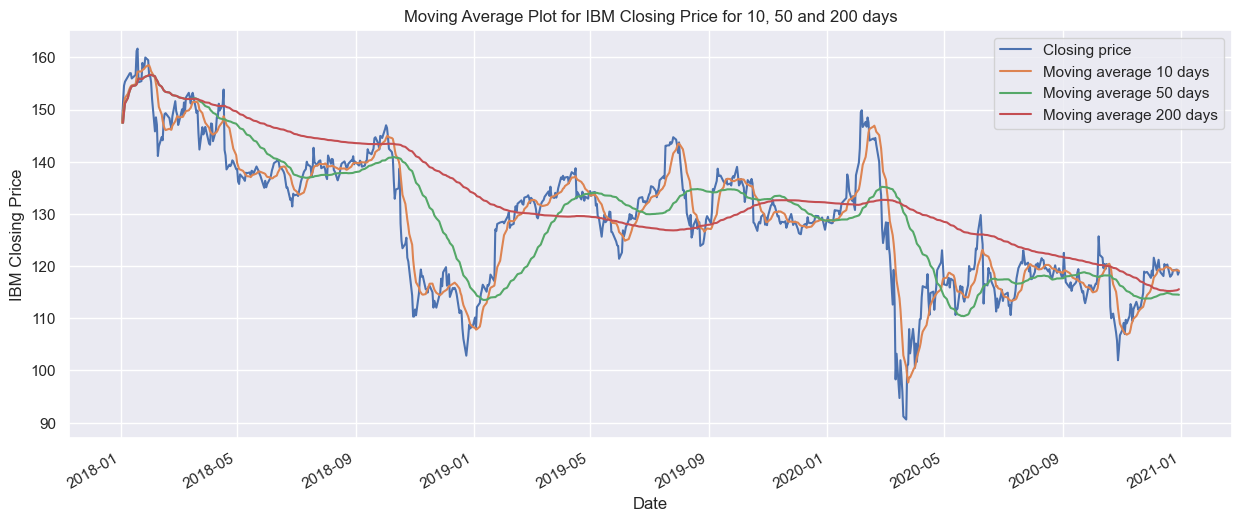

In [32]:
fig, ax = plt.subplots(figsize = (15, 6))
df1['Close'].plot(ax = ax, label = 'Closing price')
df1['SMA_10'].plot(ax = ax, label = 'Moving average 10 days')
df1['SMA_50'].plot(ax = ax, label = 'Moving average 50 days')
df1['SMA_200'].plot(ax = ax, label = 'Moving average 200 days')

plt.ylabel('IBM Closing Price')
plt.xlabel('Date')
plt.title('Moving Average Plot for IBM Closing Price for 10, 50 and 200 days')
plt.legend()

plt.show();

The increasing and decreasing mean can be seen in the graph above, indicating that our series isn’t stationary.

As we know the stock prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average

### RSI (Momentum)

Another commonly used indicator is a Relative Strength Index (RSI) that indicates magnitude of recent price changes. It can show that a stock is either overbought or oversold. Typically RSI value of 70 and above signal that a stock is becoming overbought/overvalued, meanwhile value of 30 and less can mean that it is oversold. Full range of RSI is from 0 to 100.

In [36]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

num_days = 365
df1['RSI'] = RSI(df1).fillna(0)

In [37]:
df1['Date'] = df1.index
df1

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  147.705551  148.001907  146.787766  147.466537  108.470901   
2018-01-03  150.420654  152.782028  149.455063  151.520081  111.452560   
2018-01-04  152.629059  155.181641  152.361374  154.588913  113.709854   
2018-01-05  155.296371  155.736145  154.015289  155.344162  114.265411   
2018-01-08  155.506699  156.701721  154.588913  156.281067  114.954559   
...                ...         ...         ...         ...         ...   
2020-12-23  118.432121  119.703636  118.298279  118.451241  100.442368   
2020-12-24  119.502869  119.598473  118.747612  119.206497  101.082787   
2020-12-28  119.598473  121.032501  118.986618  119.330788  101.188187   
2020-12-29  119.837479  119.961761  117.820267  118.355644  100.361298   
2020-12-30  118.355644  119.359467  118.193115  118.871895  100.799057   

             Volume   Returns       EMA_9      SMA_10      SMA_50     SMA_200  \
Date                                                                            
2018-01-02  4395815       NaN         NaN  147.466537         NaN         NaN   
2018-01-03  9875914  2.748788  147.466537  149.493309  147.466537  147.466537   
2018-01-04  7903785  2.025363  149.677561  151.191844  149.493309  149.493309   
2018-01-05  5434807  0.488553  151.620513  152.229923  151.191844  151.191844   
2018-01-08  5478425  0.603116  152.819184  153.040152  152.229923  152.229923   
...             ...       ...         ...         ...         ...         ...   
2020-12-23  2817819  0.234607  119.041758  119.172083  114.594646  115.245268   
2020-12-24  1842111  0.637610  118.943338  119.146270  114.571702  115.273614   
2020-12-28  3781499  0.104265  118.987198  119.198852  114.547801  115.378203   
2020-12-29  3647402 -0.817177  119.044463  119.224665  114.546463  115.458843   
2020-12-30  3535794  0.436186  118.929660  119.072658  114.505736  115.577008   

                  RSI       Date  
Date                              
2018-01-02        NaN 2018-01-02  
2018-01-03   0.000000 2018-01-03  
2018-01-04   0.000000 2018-01-04  
2018-01-05   0.000000 2018-01-05  
2018-01-08   0.000000 2018-01-08  
...               ...        ...  
2020-12-23  50.829039 2020-12-23  
2020-12-24  41.456768 2020-12-24  
2020-12-28  50.487014 2020-12-28  
2020-12-29  42.254712 2020-12-29  
2020-12-30  39.609864 2020-12-30  

[755 rows x 13 columns]

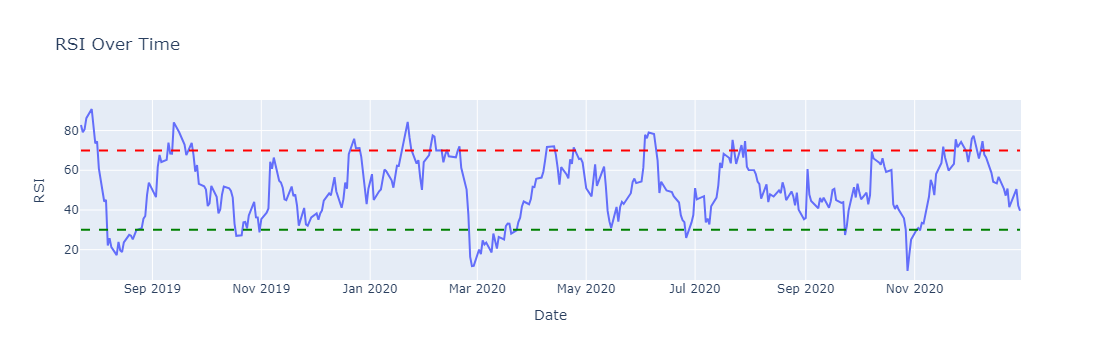

In [38]:
fig = go.Figure(go.Scatter(x=df1.Date.tail(num_days), y=df1.RSI.tail(num_days)))

# Add horizontal lines at RSI 70 and RSI 30
fig.add_shape(type="line", x0=df1.Date.tail(num_days).min(), y0=70, x1=df1.Date.tail(num_days).max(), y1=70,
              line=dict(color="red", width=2, dash="dash"), name="Overbought (70)")
fig.add_shape(type="line", x0=df1.Date.tail(num_days).min(), y0=30, x1=df1.Date.tail(num_days).max(), y1=30,
              line=dict(color="green", width=2, dash="dash"), name="Oversold (30)")

# Add titles and labels
fig.update_layout(
    title="RSI Over Time",
    xaxis_title="Date",
    yaxis_title="RSI",
    shapes=[dict(type='line', x0=df1.Date.tail(num_days).min(), x1=df1.Date.tail(num_days).max(), y0=70, y1=70, line=dict(color='red', dash='dash')),
            dict(type='line', x0=df1.Date.tail(num_days).min(), x1=df1.Date.tail(num_days).max(), y0=30, y1=30, line=dict(color='green', dash='dash'))]
)
fig.show()

### Bollinger Bands (Volatility)

Using Bollinger Bands Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average. The bollinger bands comprise the following data points: The 14 day rolling mean of the closing price (mvoing average), Upper band which is the rolling mean + 2 standard deviations away from the average. Lower band which is the rolling mean - 2 standard deviations away from the average. Bollinger bands are extremely reliable, with a 95% confidance at 2 standard deviations and especially useful in sideways moving market.

In [41]:
# Close 20 MA
df1['SMA_20'] = df1['Close'].rolling(20).mean()

# Upper = 20MA + 2*std(20)
df1['Upper'] = df1['SMA_20'] + 2*(df1['Close'].rolling(20).std())

# Lower = 20MA - 2*std(20)
df1['Lower'] = df1['SMA_20'] - 2*(df1['Close'].rolling(20).std())

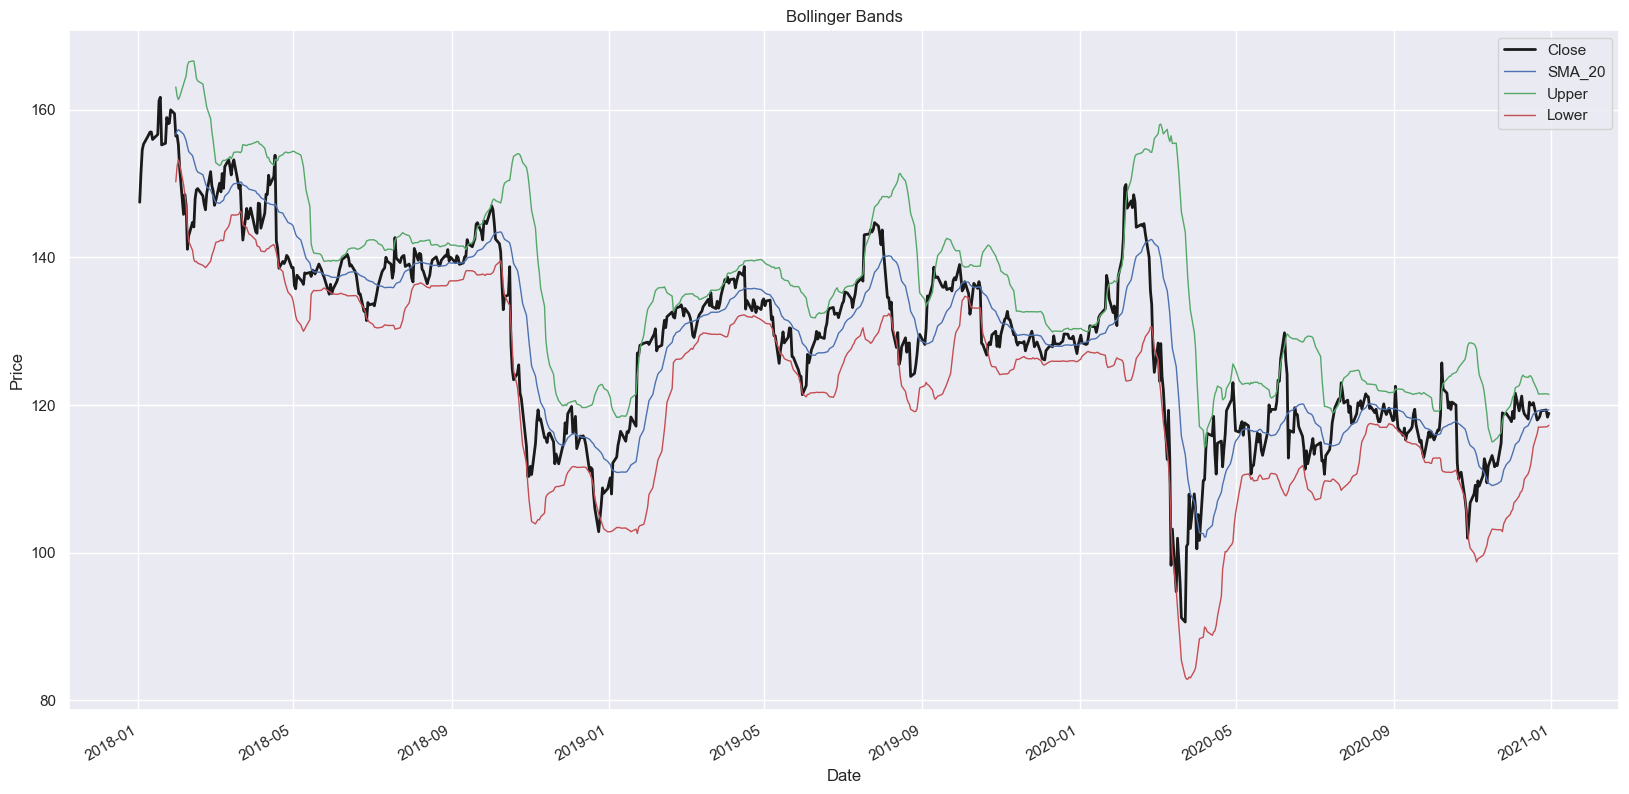

In [42]:
# plotting and visualization of bollinger bands
df1['Close'].plot(c = 'k', figsize = (20,10), lw = 2)
df1['SMA_20'].plot(c = 'b', figsize = (20, 10), lw = 1)
df1['Upper'].plot(c = 'g', figsize = (20, 10), lw = 1) 
df1['Lower'].plot(c = 'r', figsize = (20, 10), lw = 1)

# show plot
plt.title('Bollinger Bands')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.grid(True)

plt.show()

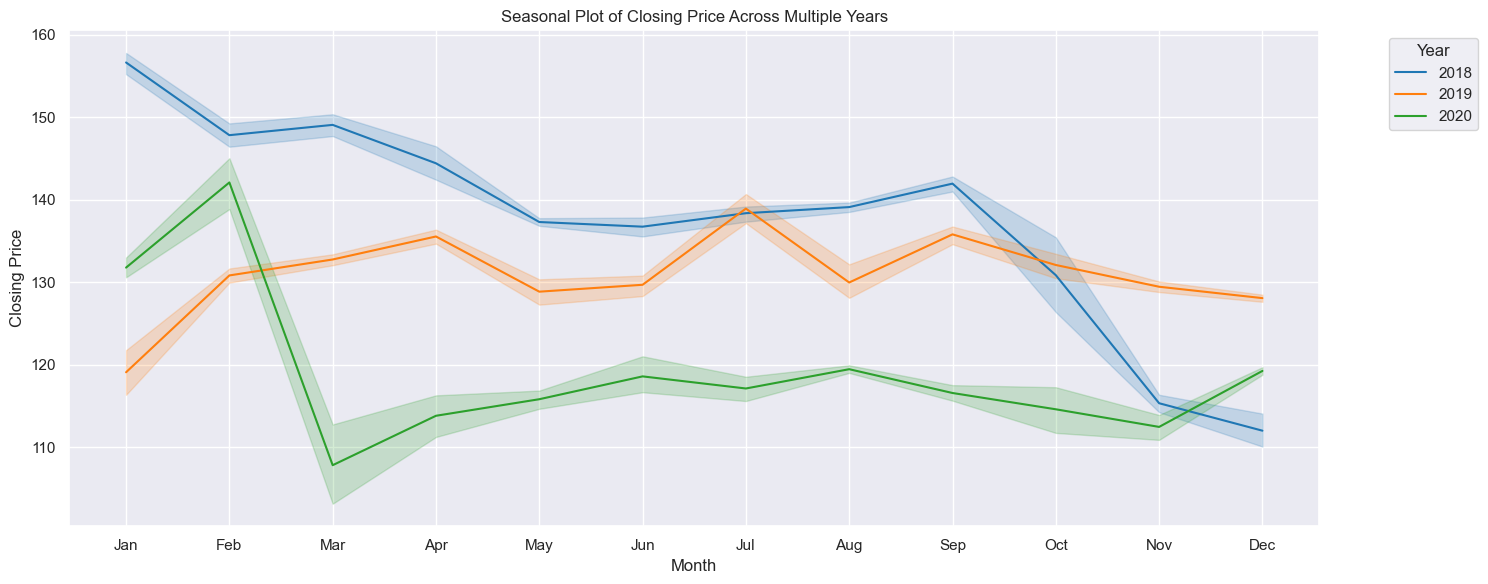

In [45]:
# Plot setup (without creating Year and Month columns)
plt.figure(figsize=(15, 6))
sns.lineplot(x=df1.index.month, y='Close', hue=df1.index.year, data=df1, palette='tab10', legend='full')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.title('Seasonal Plot of Closing Price Across Multiple Years')

# Customizing the x-axis with month names
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend

plt.show()

### Correlation in Financial Time Series

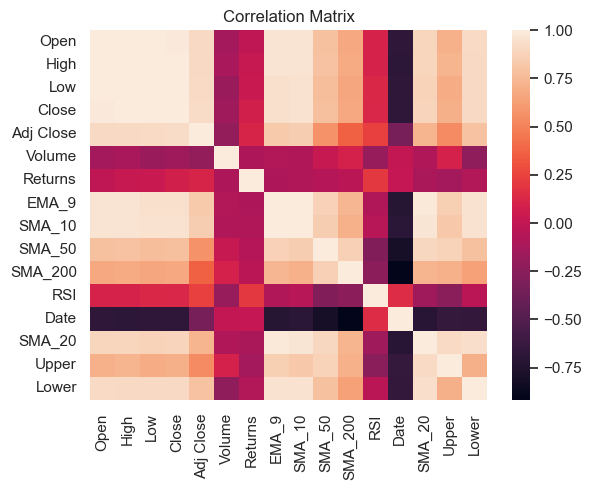

In [47]:
# Correlation matrix
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

### OLS or Regression Analysis

##### Eliminate Trend and Seasonality

Seasonality and trend may need to be separated from our series before we can undertake a time series analysis. This approach will cause the resulting series to become stagnant.

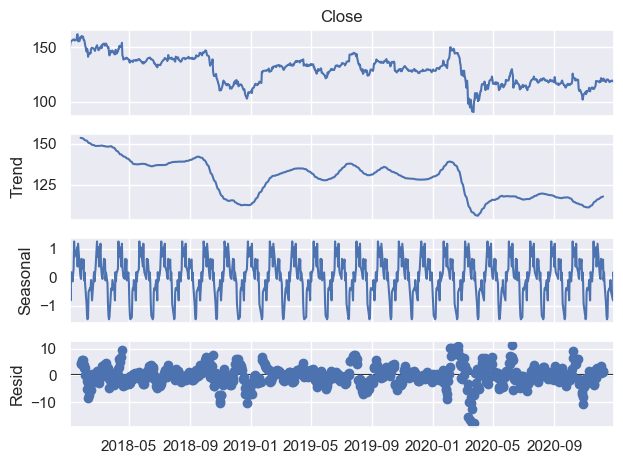

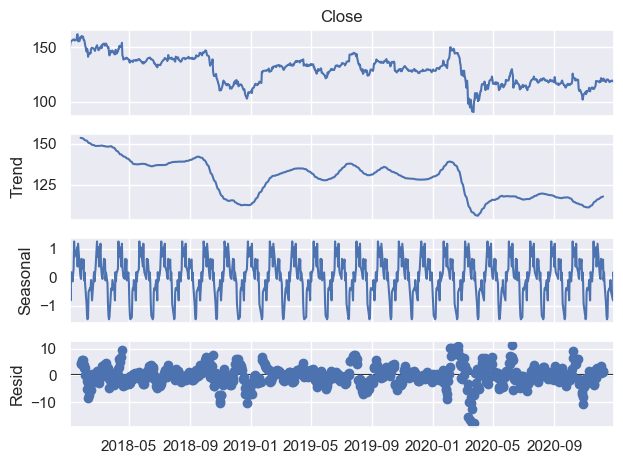

In [50]:
result = seasonal_decompose(df1['Close'], model='additive', period=30)
result.plot()

A more statistical analysis of your financial data, with a more traditional regression analysis, such as the Ordinary Least-Squares Regression (OLS).

In [52]:
import statsmodels.api as sm

# Linear regression to test the relationship between Volume and Price
df1['Lagged_Price'] = df1['Close'].shift(-1)
df1 = df1.dropna()
X = df1[['Volume']]
y = df1['Lagged_Price']

X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Lagged_Price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     42.01
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.67e-10
Time:                        02:45:45   Log-Likelihood:                -2849.2
No. Observations:                 735   AIC:                             5702.
Df Residuals:                     733   BIC:                             5712.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.0533      0.840    158.340      0.0

R-squared, which is the coefficient of determination. This score indicates how well the regression line approximates the real data points. In this case, the result is 0.032. In percentages, this means that the score is at 3.2%. When the score is 0%, it indicates that the model explains none of the variability of the response data around its mean. Of course, a score of 100% indicates the opposite.

You also see the Adj. R-squared score, which at first sight gives the same number. However, the calculation behind this metric adjusts the R-Squared value based on the number of observations and the degrees-of-freedom of the residuals (registered in DF Residuals). The adjustment in this case hasn't had much effect, as the result of the adjusted score is still the same as the regular R-squared score


The F-statistic measures how significant the fit is. It is calculated by dividing the mean squared error of the model by the mean squared error of the residuals. The F-statistic for this model  117.2.

.
Next, there's also the Prob (F-statistic), which indicates the probability that you would get the result of the F-statistic, given the null hypothesis that they are unrelat

d.
The Log-likelihood indicates the log of the likelihood function, which is, in this c-16045.

.2.
The AIC is the Akaike Information Criterion: this metric adjusts the log-likelihood based on the number of observations and the complexity of the model. The AIC of this mode3.209e+04-

022.
Lastly, the BIC or the Bayesian Information Criterion, is similar to the AIC that you just have seen, but it penalizes models with more parameters more severely. Given the fact that this model only has one parameter (check DF Model), the BIC score will be the same as the AIC 
score.
Below the first part of the model summary, you see reports for each of the model's coeffic
ents:

The estimated value of the coefficient is registered

at coef.
std err is the standard error of the estimate of the co

fficient.
There's also the t-statistic value, which you'll find under t. This metric is used to measure how statistically signififant a coef

icient is.
P > |t| indicates the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response. In this case, you see that the constant has a value of 0.198, while AAPL is set at 0.000.